In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-student-migration-and-higher-education-trends/global_student_migration.csv


In [3]:
path = "/kaggle/input/global-student-migration-and-higher-education-trends/global_student_migration.csv"
data = pd.read_csv(path)
data.head(100)

,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,UK,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
2,S00003,Ireland,Canada,Vancouver,University of British Columbia,Law,Arts,2019,No,Scholarship,2020,Not Placed,NaN,NaN,0,2.72,F1,Blue Card,NaN,0.0
3,S00004,UAE,UK,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,NaN,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,S00096,Finland,USA,Chicago,University of Chicago,Psychology,Arts,2021,No,Higher Ranking,2024,Not Placed,NaN,NaN,0,3.01,Study Permit,OPT,IELTS,7.7
96,S00097,Finland,USA,New York,Columbia University,Computer Science,Medicine,2022,No,Quality of Life,2023,Not Placed,NaN,NaN,0,3.79,J1,OPT,TOEFL,5.7
97,S00098,Russia,India,Pilani,BITS Pilani,Design,Arts,2021,Yes,Scholarship,2024,Not Placed,NaN,NaN,0,3.44,Tier 4,OPT,PTE,5.7
98,S00099,South Africa,Germany,Berlin,TU Berlin,Law,Social Sciences,2022,No,Higher Ranking,2025,Placed,Germany,SAP,59168,3.91,F1,PSW,NaN,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 5000 non-null   object 
 1   origin_country             5000 non-null   object 
 2   destination_country        5000 non-null   object 
 3   destination_city           5000 non-null   object 
 4   university_name            5000 non-null   object 
 5   course_name                5000 non-null   object 
 6   field_of_study             5000 non-null   object 
 7   year_of_enrollment         5000 non-null   int64  
 8   scholarship_received       5000 non-null   object 
 9   enrollment_reason          5000 non-null   object 
 10  graduation_year            5000 non-null   int64  
 11  placement_status           5000 non-null   object 
 12  placement_country          2509 non-null   object 
 13  placement_company          2509 non-null   objec

In [5]:
data.describe()

,year_of_enrollment,graduation_year,starting_salary_usd,gpa_or_score,test_score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2021.011000,2023.017800,44552.531000,3.246820,5.632200
std,1.420733,1.651432,50719.190623,0.430659,2.973838
min,2019.000000,2020.000000,0.000000,2.500000,0.000000
25%,2020.000000,2022.000000,0.000000,2.877500,5.300000
50%,2021.000000,2023.000000,30516.500000,3.240000,6.500000
75%,2022.000000,2024.000000,87838.500000,3.610000,7.800000
max,2023.000000,2026.000000,149932.000000,4.000000,9.000000


In [6]:
data.isna().sum()

student_id                      0
origin_country                  0
destination_country             0
destination_city                0
university_name                 0
course_name                     0
field_of_study                  0
year_of_enrollment              0
scholarship_received            0
enrollment_reason               0
graduation_year                 0
placement_status                0
placement_country            2491
placement_company            2491
starting_salary_usd             0
gpa_or_score                    0
visa_status                     0
post_graduation_visa            0
language_proficiency_test     982
test_score                      0
dtype: int64

In [7]:
data.columns

Index(['student_id', 'origin_country', 'destination_country',
       'destination_city', 'university_name', 'course_name', 'field_of_study',
       'year_of_enrollment', 'scholarship_received', 'enrollment_reason',
       'graduation_year', 'placement_status', 'placement_country',
       'placement_company', 'starting_salary_usd', 'gpa_or_score',
       'visa_status', 'post_graduation_visa', 'language_proficiency_test',
       'test_score'],
      dtype='object')

Text(0.5, 0, 'Top study destination countries')

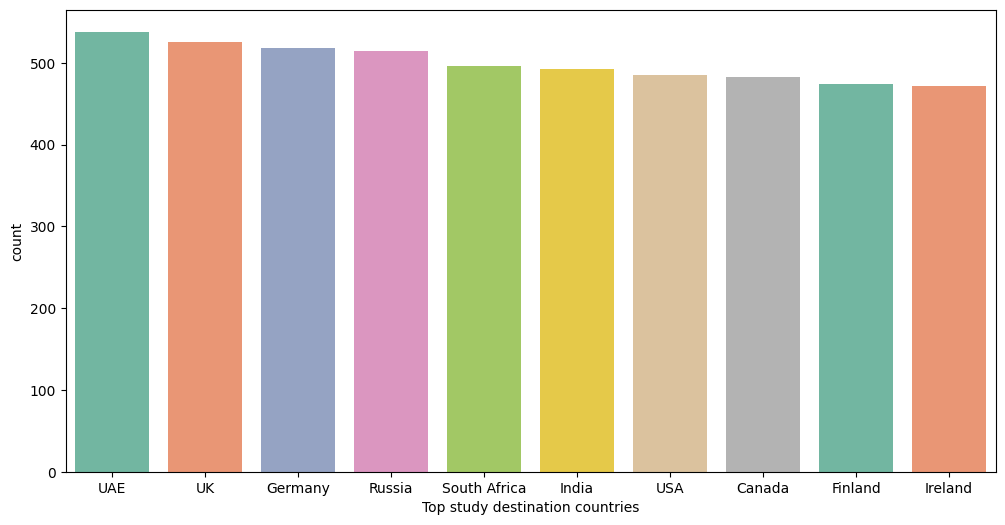

In [8]:
plt.figure(figsize=(12, 6))

top_order = data['destination_country'].value_counts().index
sns.countplot(x="destination_country", data=data, order=top_order, palette='Set2')
plt.xlabel('Top study destination countries')

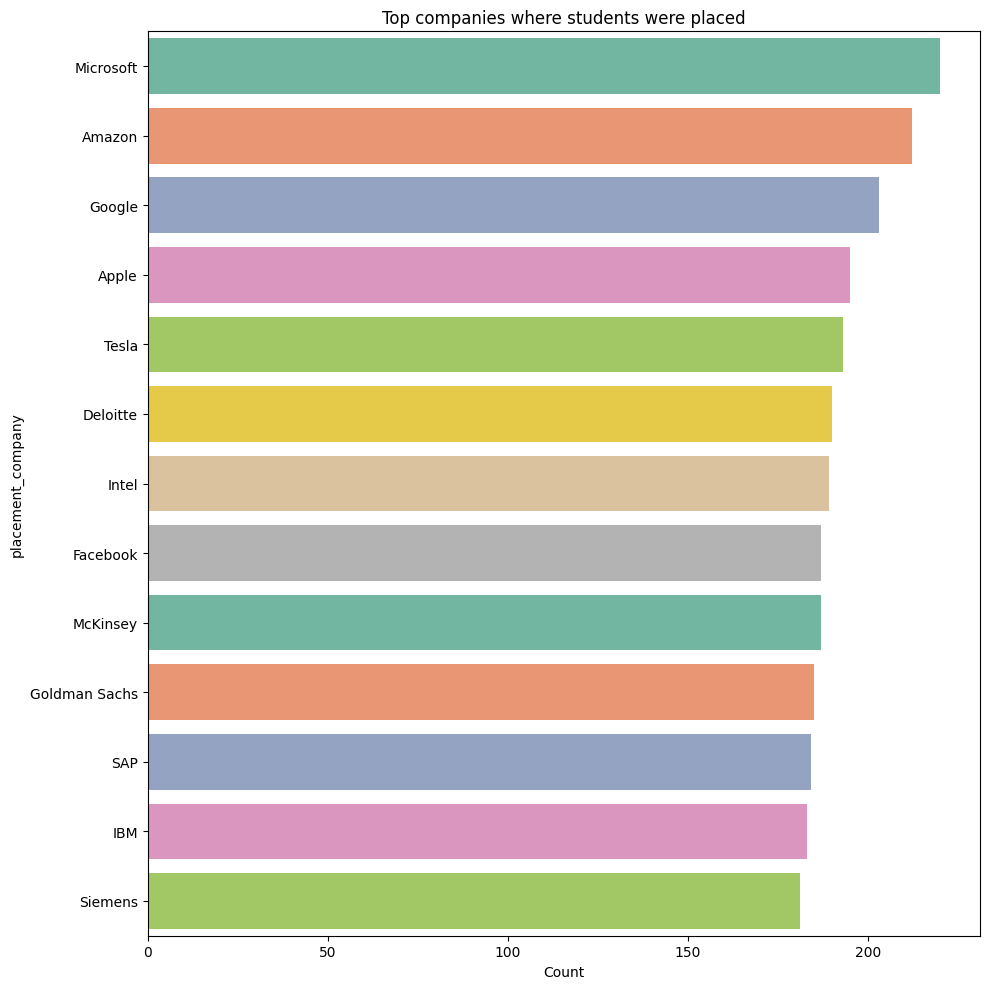

In [9]:
plt.figure(figsize=(10, 10))

top_order = data['placement_company'].value_counts().index
sns.countplot(y='placement_company', data=data, order=top_order, palette='Set2')


plt.title('Top companies where students were placed')
plt.xlabel('Count')
plt.ylabel('placement_company')

plt.tight_layout()
plt.show()

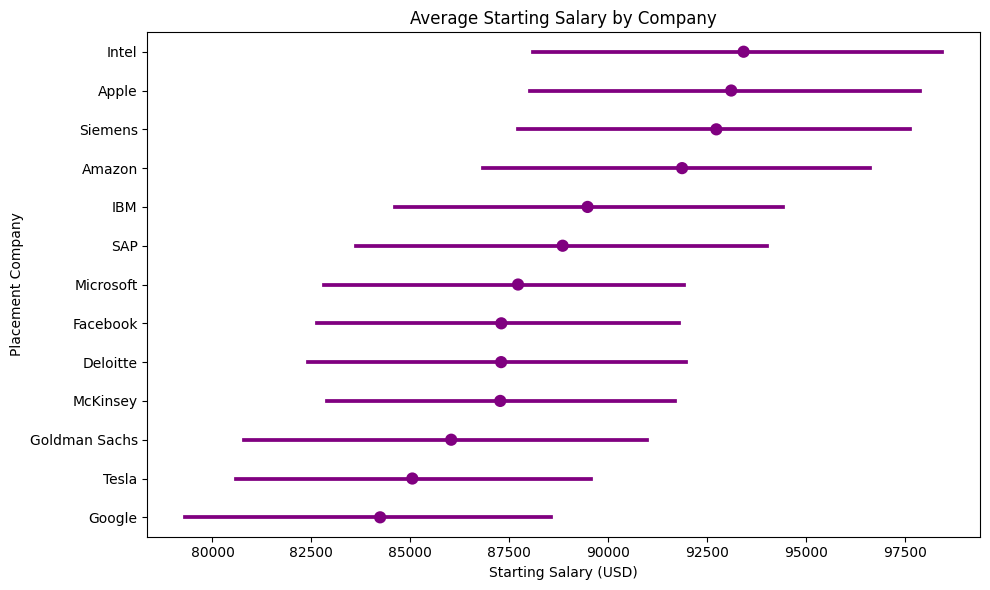

In [10]:
salary_order = data.groupby('placement_company')['starting_salary_usd'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
sns.pointplot(
    x='starting_salary_usd',
    y='placement_company',
    data=data,
    order=salary_order,
    color='purple',
    join=False
)

plt.title("Average Starting Salary by Company")
plt.xlabel("Starting Salary (USD)")
plt.ylabel("Placement Company")
plt.tight_layout()
plt.show()

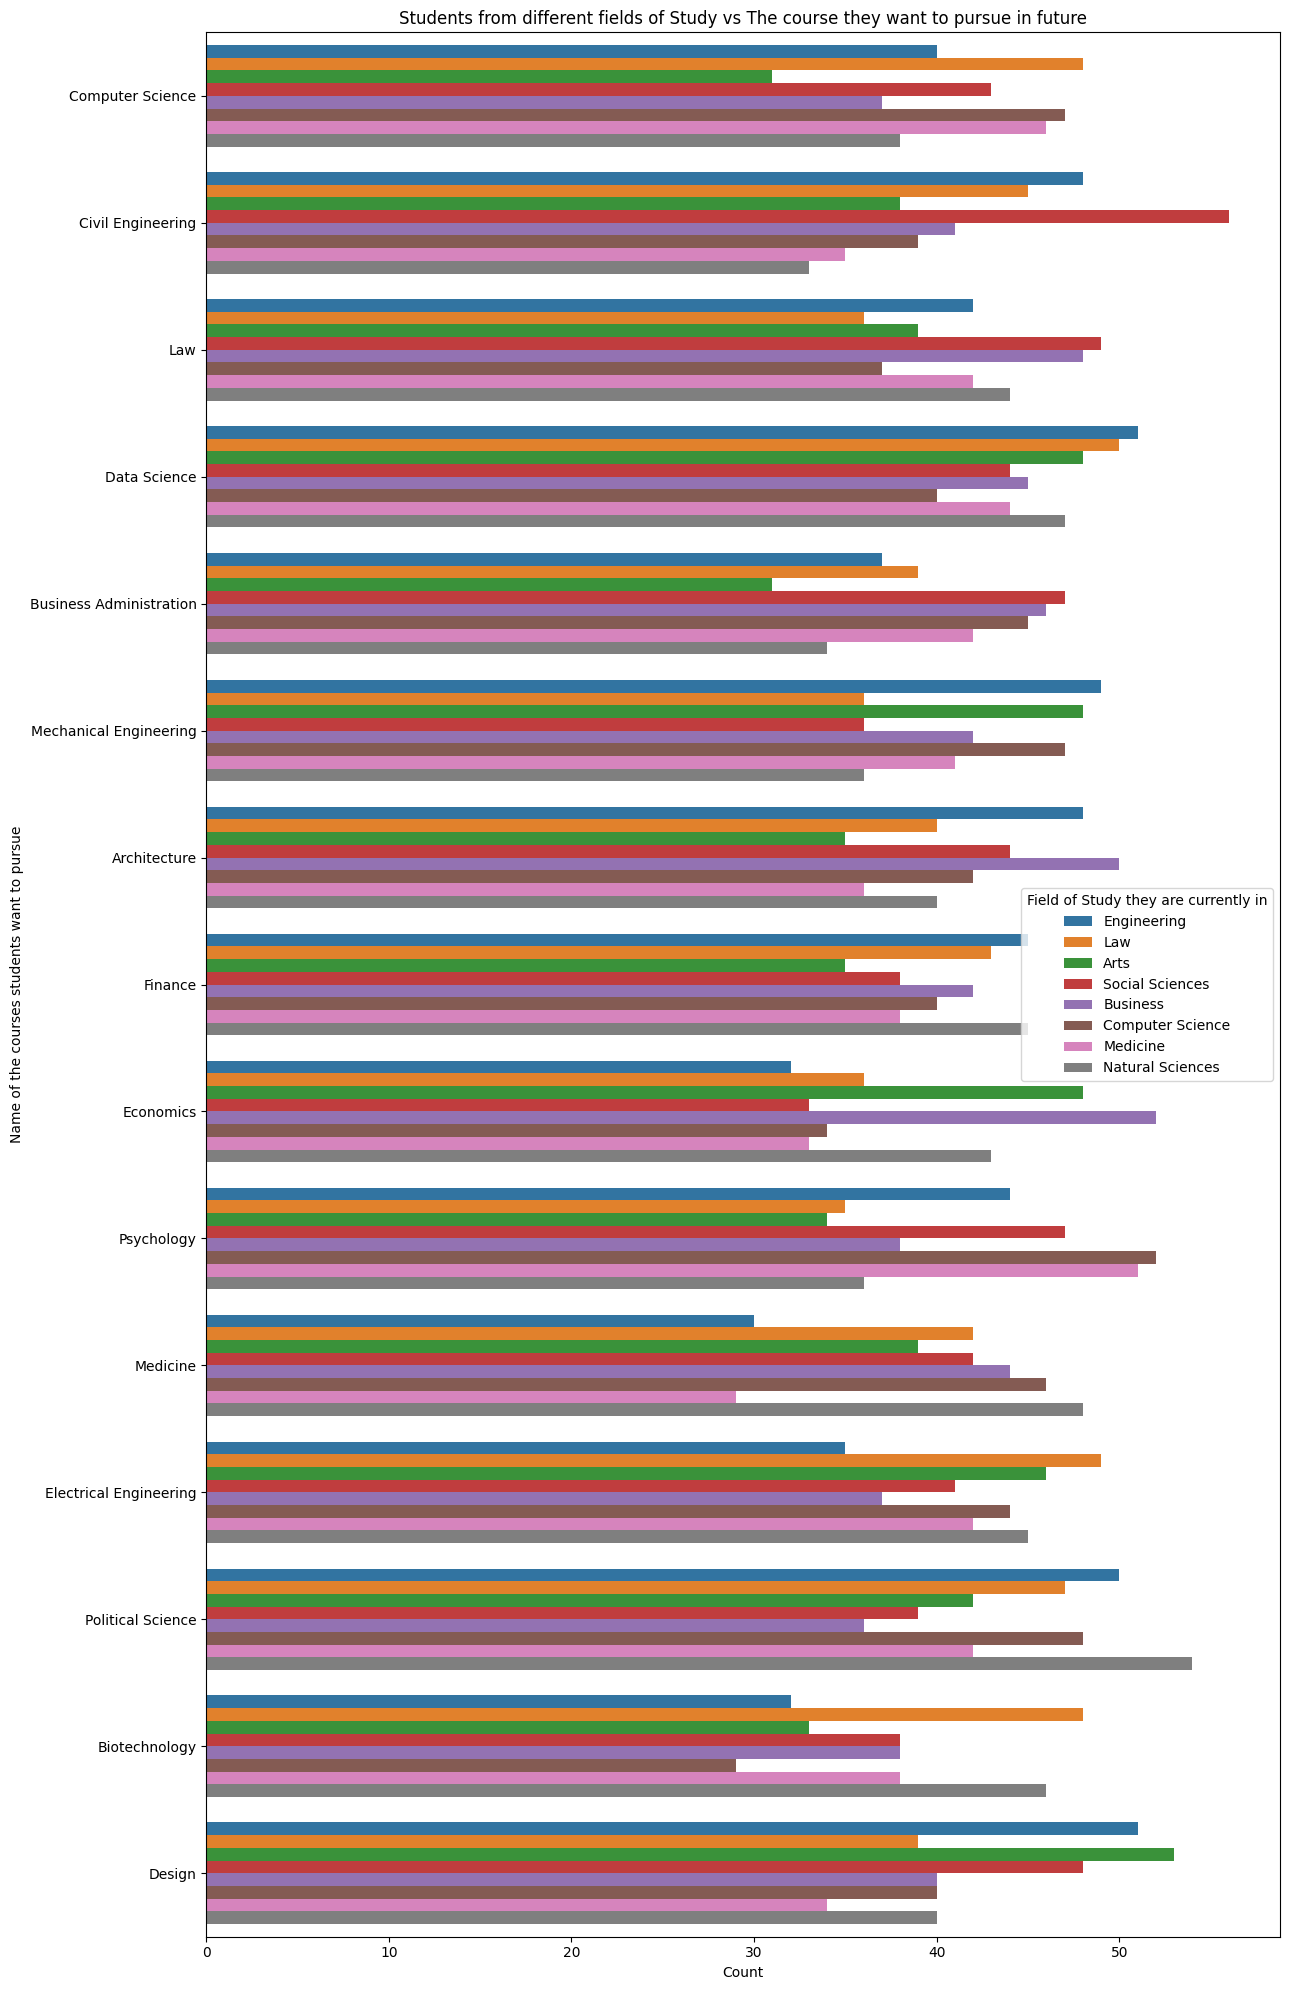

In [11]:
plt.figure(figsize=(13, 20))
sns.countplot(y='course_name', hue='field_of_study', data=data)
plt.title('Students from different fields of Study vs The course they want to pursue in future')
plt.xlabel('Count')
plt.ylabel('Name of the courses students want to pursue')
plt.legend(title='Field of Study they are currently in')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


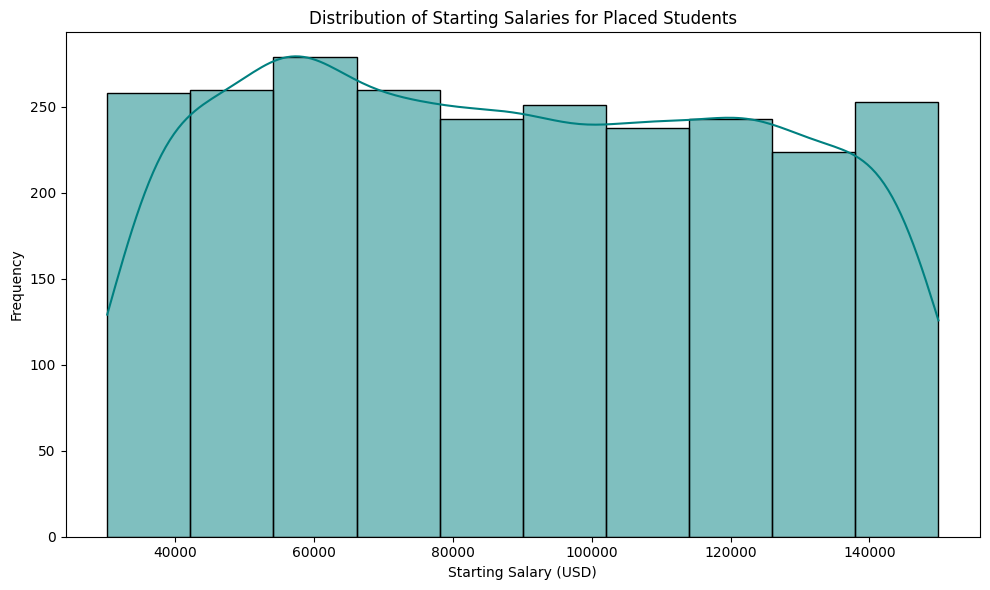

In [12]:
data_placed = data[data['placement_status'] == 'Placed'].dropna(subset=['starting_salary_usd'])

# Create histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data_placed, x='starting_salary_usd', bins=10, color='teal', kde=True)
plt.title('Distribution of Starting Salaries for Placed Students')
plt.xlabel('Starting Salary (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


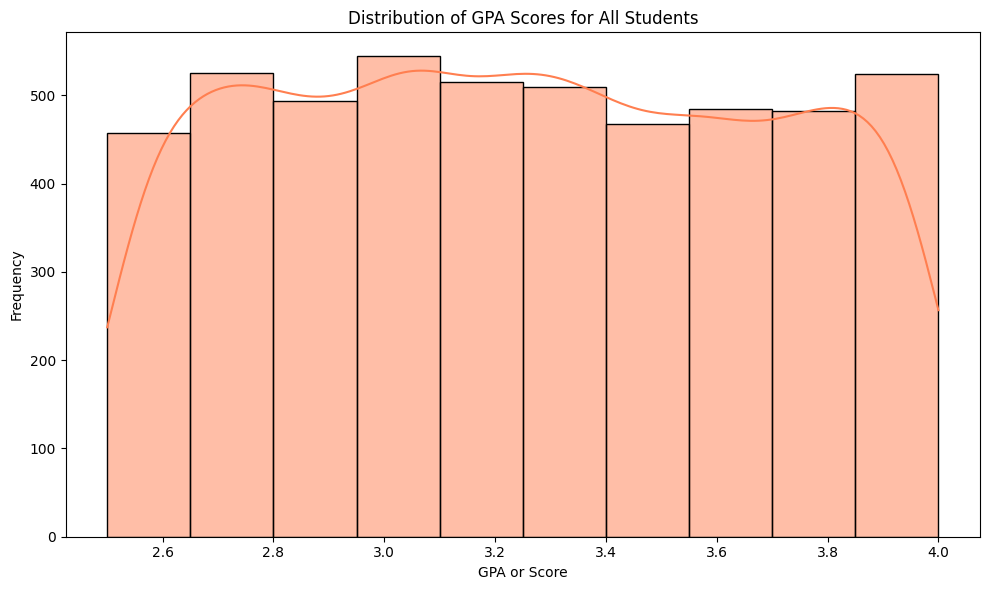

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='gpa_or_score', bins=10, color='coral', kde=True)
plt.title('Distribution of GPA Scores for All Students')
plt.xlabel('GPA or Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

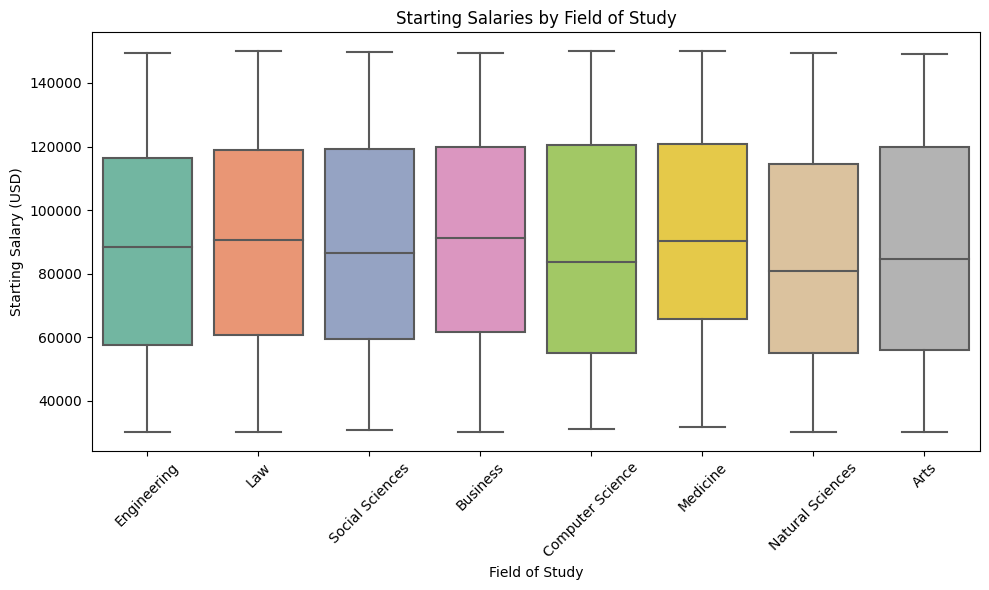

In [14]:
data_placed = data[data['placement_status'] == 'Placed'].dropna(subset=['starting_salary_usd', 'field_of_study'])

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='field_of_study', y='starting_salary_usd', data=data_placed, palette='Set2')
plt.title('Starting Salaries by Field of Study')
plt.xlabel('Field of Study')
plt.ylabel('Starting Salary (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

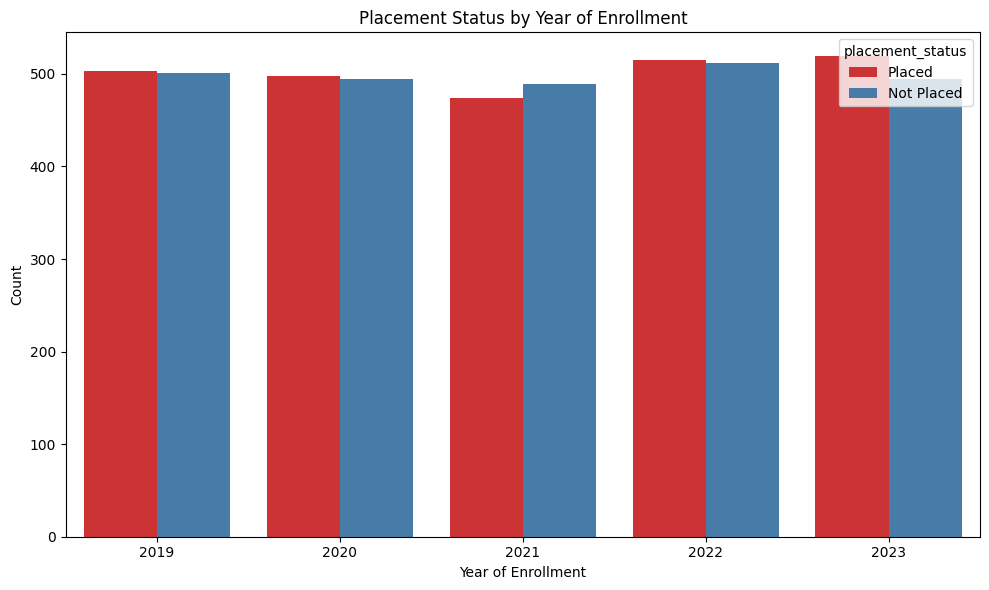

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year_of_enrollment', hue='placement_status', data=data, palette='Set1')
plt.title('Placement Status by Year of Enrollment')
plt.xlabel('Year of Enrollment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

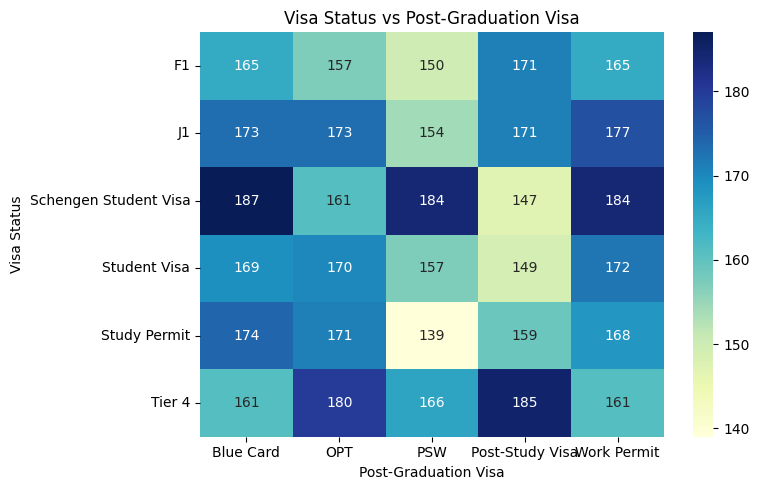

In [16]:
ct = pd.crosstab(data['visa_status'], data['post_graduation_visa'])

plt.figure(figsize=(8, 5))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Visa Status vs Post-Graduation Visa')
plt.xlabel('Post-Graduation Visa')
plt.ylabel('Visa Status')
plt.tight_layout()
plt.show()